# Proyek Klasifikasi Gambar: Intel Image Classification
Dataset: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
- Data contains around 17k images of size 150x150 distributed under 6 categories.
{'buildings',
'forest',
'glacier',
'mountain',
'sea',
'street'}
- Train: 11.929 images
- Val: 2.105 images
- Test: 3.000 images

## 1. Import library

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import load_img, img_to_array

print("TF version:", tf.__version__)

TF version: 2.18.0


## 2. Path and Hyperparameters

In [4]:
base_dir = r'C:\Users\didan\DBS Coding Camp 2025\(Klasifikasi) Belajar Pengembangan Machine Learning\dataset'
train_dir = os.path.join(base_dir, r"C:\Users\didan\DBS Coding Camp 2025\(Klasifikasi) Belajar Pengembangan Machine Learning\dataset\seg_train\seg_train")
val_dir   = os.path.join(base_dir, r"C:\Users\didan\DBS Coding Camp 2025\(Klasifikasi) Belajar Pengembangan Machine Learning\dataset\seg_val")
test_dir  = os.path.join(base_dir, r"C:\Users\didan\DBS Coding Camp 2025\(Klasifikasi) Belajar Pengembangan Machine Learning\dataset\seg_test\seg_test")

# Hyp
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_CLASSES = 6     # buildings, forest, glacier, mountain, sea, street
EPOCHS = 30

## 3. Data Preprocessing

In [5]:
# Augmented training generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation & Test generator (rescale)
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Buat iterator
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 11932 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## 4. Model CNN (Sequential + Conv2D + Pooling)

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

C:\Users\didan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,564,998 (36.49 MB)

 Trainable params: 9,564,998 (36.49 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Compile and Callback

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
]

## 6. Training

In [10]:
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=callbacks
)

C:\Users\didan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.4508 - loss: 1.4288

C:\Users\didan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


373/373 ━━━━━━━━━━━━━━━━━━━━ 315s 837ms/step - accuracy: 0.4510 - loss: 1.4281 - val_accuracy: 0.6142 - val_loss: 0.9286 - learning_rate: 0.0010
Epoch 2/30
373/373 ━━━━━━━━━━━━━━━━━━━━ 159s 427ms/step - accuracy: 0.6627 - loss: 0.9144 - val_accuracy: 0.7336 - val_loss: 0.7222 - learning_rate: 0.0010
Epoch 3/30
373/373 ━━━━━━━━━━━━━━━━━━━━ 156s 417ms/step - accuracy: 0.7051 - loss: 0.8052 - val_accuracy: 0.7498 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 4/30
373/373 ━━━━━━━━━━━━━━━━━━━━ 158s 423ms/step - accuracy: 0.7350 - loss: 0.7427 - val_accuracy: 0.7636 - val_loss: 0.6244 - learning_rate: 0.0010
Epoch 5/30
373/373 ━━━━━━━━━━━━━━━━━━━━ 156s 419ms/step - accuracy: 0.7613 - loss: 0.6737 - val_accuracy: 0.7678 - val_loss: 0.6057 - learning_rate: 0.0010
Epoch 6/30
373/373 ━━━━━━━━━━━━━━━━━━━━ 160s 430ms/step - accuracy: 0.7731 - loss: 0.6502 - val_accuracy: 0.7907 - val_loss: 0.5775 - learning_rate: 0.0010
Epoch 7/30
373/373 ━━━━━━━━━━━━━━━━━━━━ 166s 444ms/step - accuracy: 0.7821 

## 7. Plot Akurasi & Loss

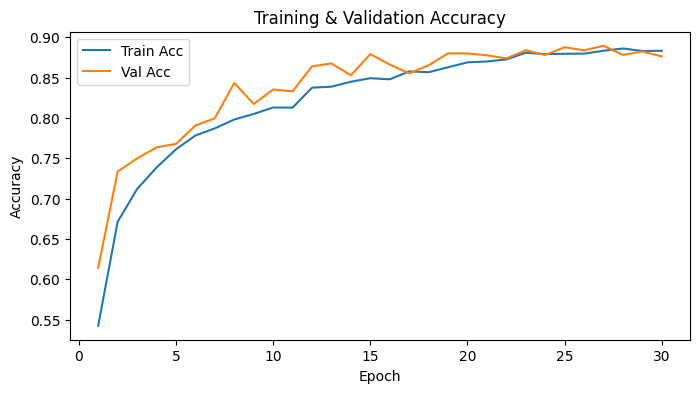

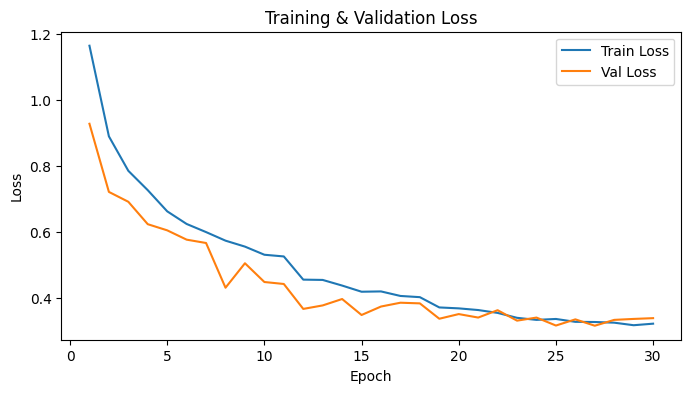

In [11]:
# Ambil history
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc)+1)

#  Plot akurasi
plt.figure(figsize=(8,4))
plt.plot(epochs, acc, label='Train Acc')
plt.plot(epochs, val_acc, label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(8,4))
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 8. Evaluasi Test set

In [12]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test accuracy: {test_acc*100:.2f} %")

94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 381ms/step - accuracy: 0.8888 - loss: 0.3479
Test accuracy: 88.37 %


## 9. save Model

In [15]:
# Ekspor SavedModel
model.export('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2003983976400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003983978512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003983979568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003983980800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003983983968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003983980624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003983985904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003983982208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003983988192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2003983986080: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [16]:
# Konversi ke TFLite
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [28]:
model.save('model.h5')

In [25]:
%pip install tensorflowjs==4.14.0 --prefer-binary --no-deps

   ---------------------------------------- 0.0/89.2 kB ? eta -:--:--
   -------------------------------- ------- 71.7/89.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 89.2/89.2 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Konversi ke TFJS
'''
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'tfjs_model')
'''

"\nimport tensorflowjs as tfjs\ntfjs.converters.save_keras_model(model, 'tfjs_model')\n"